#  Titanic Espacial
Predecir qué pasajeros son transportados a una dimensión alternativa


La nave espacial Titanic fue un transatlántico interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la incauta nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, corrió un destino similar al de su homónimo de 1000 años antes. Aunque el barco permaneció intacto, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a los equipos de rescate y recuperar a los pasajeros perdidos, tenemos el desafío de predecir qué pasajeros fueron transportados por la anomalía utilizando registros recuperados del sistema informático dañado de la nave espacial.

Vamos a salvarlos y cambiar la historia!









### Capítulo 1: Un mensaje del espacio

Recibí los datos, como un mensaje del espacio distante. Ahora, organizo las herramientas para navegar en este desafío.

In [1]:
# Manipulación y Análisis de Datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandasgui import show

# Preprocesamiento de Datos
from sklearn.calibration import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

# Exploración y Evaluación de Modelos
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Otras Librerías
import numpy as np
import time
from sklearn.pipeline import Pipeline

In [2]:
print("Importamos los datos  y visualizamos la informacion Basica")
print("")
train_data=pd.read_csv('../data/train.csv')
test_data=pd.read_csv('../data/test.csv')
print("Tenemos ", train_data.shape[0], "registros y ",train_data.shape[1],"columnas en el dataframe de entrenamiento")
print("Tenemos ", test_data.shape[0], "registros y ",test_data.shape[1],"columnas en el dataframe de pruebas ")
print("Podemos resumir que en la nave viajaban ", train_data.shape[0]+test_data.shape[0], "personas")

Importamos los datos  y visualizamos la informacion Basica

Tenemos  8693 registros y  14 columnas en el dataframe de entrenamiento
Tenemos  4277 registros y  13 columnas en el dataframe de pruebas 
Podemos resumir que en la nave viajaban  12970 personas


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Descripcion de las columnas de nuestro dataset

| Columna     | Descripción |
|-------------|-------------|
| PassengerId | Un ID único para cada pasajero. Cada ID toma la forma gggg_pp donde gggg indica un grupo con el que el pasajero está viajando y pp es su número dentro del grupo. Las personas en un grupo son a menudo miembros de la familia, pero no siempre. |
| HomePlanet  | El planeta del cual el pasajero partió, generalmente su planeta de residencia permanente. |
| CryoSleep   | Indica si el pasajero eligió entrar en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados a sus cabinas. |
| Cabin       | El número de la cabina donde el pasajero se aloja. Tiene la forma deck/num/side, donde side puede ser P para babor o S para estribor. |
| Destination | El planeta al que el pasajero desembarcará. |
| Age         | La edad del pasajero. |
| VIP         | Si el pasajero ha pagado por un servicio VIP especial durante el viaje. |
| RoomService, FoodCourt, ShoppingMall, Spa, VRDeck | La cantidad que el pasajero ha facturado en cada una de las muchas comodidades de lujo de la Spaceship Titanic. |
| Name        | El primer y último nombre del pasajero. |
| Transported | Si el pasajero fue transportado a otra dimensión. Esta es la variable objetivo que intentamos predecir. |


In [4]:
print("Los Primeros 10 registros")
train_data.head(10)

Los Primeros 10 registros


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.00,False,0.00,483.00,0.00,291.00,0.00,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.00,False,42.00,1539.00,3.00,0.00,0.00,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.00,False,0.00,0.00,0.00,0.00,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.00,False,0.00,785.00,17.00,216.00,0.00,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.00,False,0.00,0.00,0.00,0.00,0.00,Erraiam Flatic,True


In [5]:
print("Los ultimos 10 registros")
train_data.tail(10)

Los ultimos 10 registros


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.00,False,86.00,3.00,149.00,208.00,329.00,Gordo Simson,False
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.00,False,0.00,0.00,0.00,0.00,0.00,Chelsa Bullisey,True
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.00,False,0.00,0.00,0.00,0.00,0.00,Polaton Conable,True
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.00,False,1.00,1146.00,0.00,50.00,34.00,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.00,False,0.00,3208.00,0.00,2.00,330.00,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.00,False,126.00,4688.00,0.00,0.00,12.00,Propsh Hontichre,True


In [6]:
print("La distribucion de la variable objetivo")
fig = px.histogram(data_frame=train_data, x=['Transported'], color=None, facet_row=
    None, facet_col=None, marginal=None, cumulative=False, )
fig.update_layout(
    height=300,  # Altura en píxeles
    width=500    # Ancho en píxeles
)
fig.show()

La distribucion de la variable objetivo


Podemos observar que la variable objetivo esta distribuida uniformemente 

## Identificacion de valores nulos

Mapa de calor con valores nulos de todo el dataset


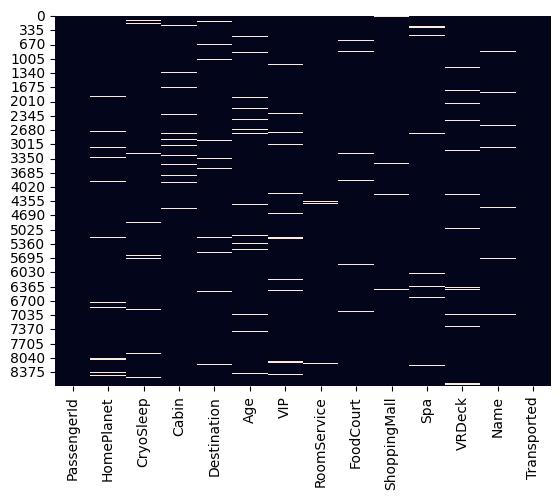

In [7]:
print("Mapa de calor con valores nulos de todo el dataset")
sns.heatmap(train_data.isnull(), cbar=False)
plt.show()

In [8]:
print("Calcular el porcentaje de valores nulos por columna")
print("")
null_percentage = (train_data.isnull().sum() / len(train_data)) * 100

# Crear un nuevo DataFrame para visualizar el porcentaje de valores nulos
null_df = pd.DataFrame({'Columna': null_percentage.index, 'Porcentaje Nulos': null_percentage.values})

# Ordenar el DataFrame por el porcentaje de valores nulos en orden descendente
null_df = null_df.sort_values(by='Porcentaje Nulos', ascending=False)

print(null_df)


Calcular el porcentaje de valores nulos por columna

         Columna  Porcentaje Nulos
2      CryoSleep              2.50
9   ShoppingMall              2.39
6            VIP              2.34
1     HomePlanet              2.31
12          Name              2.30
3          Cabin              2.29
11        VRDeck              2.16
8      FoodCourt              2.11
10           Spa              2.11
4    Destination              2.09
7    RoomService              2.08
5            Age              2.06
0    PassengerId              0.00
13   Transported              0.00


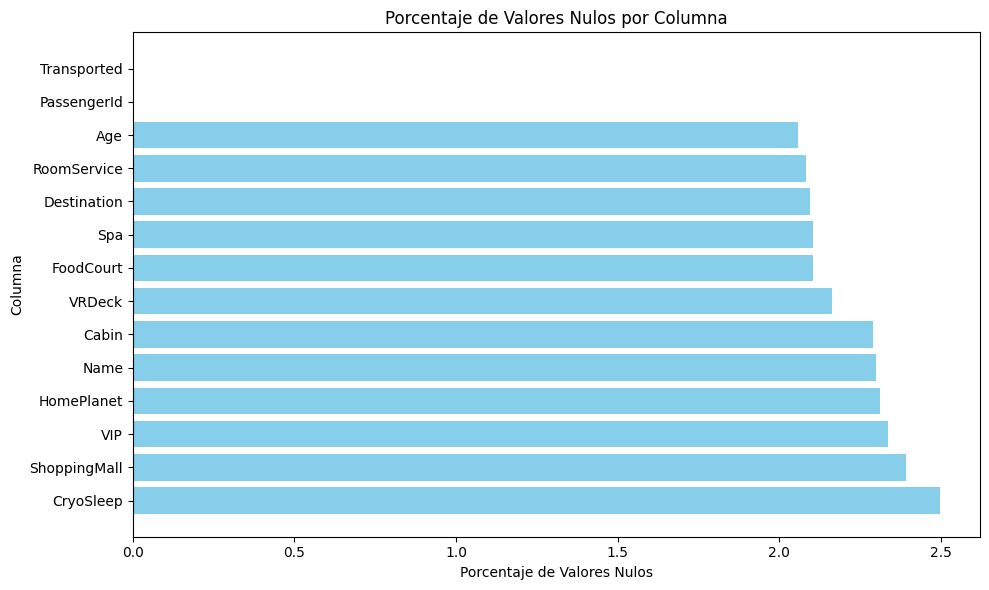

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(null_df['Columna'], null_df['Porcentaje Nulos'], color='skyblue')
plt.xlabel('Porcentaje de Valores Nulos')
plt.ylabel('Columna')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.tight_layout()
plt.show()


Se calcula el total de valores nulos por registro


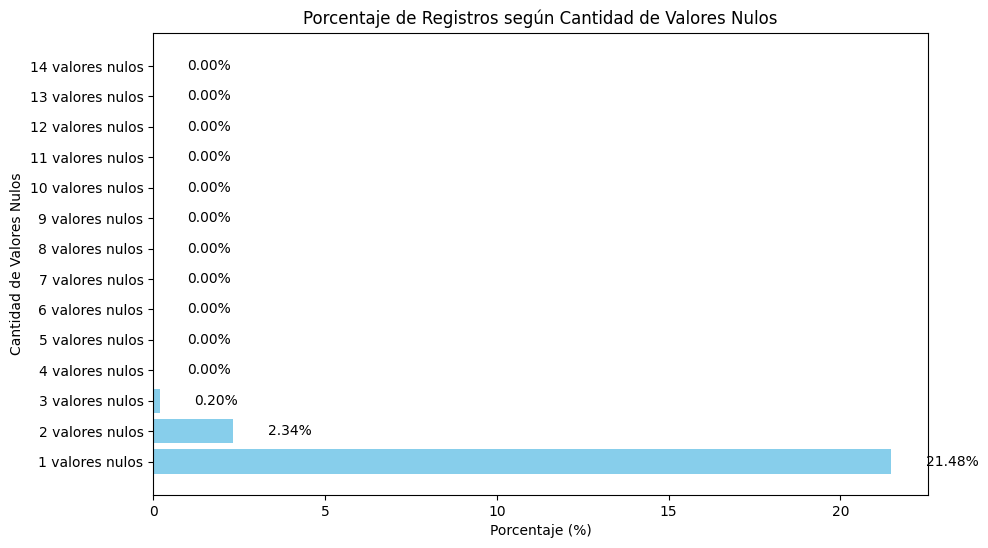

In [10]:
print("Se calcula el total de valores nulos por registro")
total_columns = len(train_data.columns)
total_records = len(train_data)
null_percentages = []

for num_nulls in range(1, total_columns + 1):
    rows_with_num_nulls = train_data[train_data.isnull().sum(axis=1) == num_nulls]
    percentage = (len(rows_with_num_nulls) / total_records) * 100
    null_percentages.append((num_nulls, len(rows_with_num_nulls), percentage))

# Ordenar la lista de porcentajes de mayor a menor
null_percentages.sort(key=lambda x: x[1], reverse=True)

# Preparar los datos para graficar
num_nulls_labels = [f"{num_nulls} valores nulos" for num_nulls, _, _ in null_percentages]
percentages = [percentage for _, _, percentage in null_percentages]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.barh(num_nulls_labels, percentages, color='skyblue')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Cantidad de Valores Nulos')
plt.title('Porcentaje de Registros según Cantidad de Valores Nulos')

# Mostrar el porcentaje en la gráfica
for i, percentage in enumerate(percentages):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center')

plt.show()


In [11]:
print("Determinamos que los registros que tienen mas de 1 columna vacia no nos determinantes y los podriamos eliminar")

Determinamos que los registros que tienen mas de 1 columna vacia no nos determinantes y los podriamos eliminar


In [12]:
profile = ProfileReport(train_data, title='Perfil de Datos', explorative=True)
# profile.to_notebook_iframe()

## Analisis univariado

### Variable "PassengerId"

Un ID único para cada pasajero. Cada ID toma la forma gggg_pp donde gggg indica un grupo con el que el pasajero está viajando y pp es su número dentro del grupo. Las personas en un grupo son a menudo miembros de la familia, pero no siempre. |

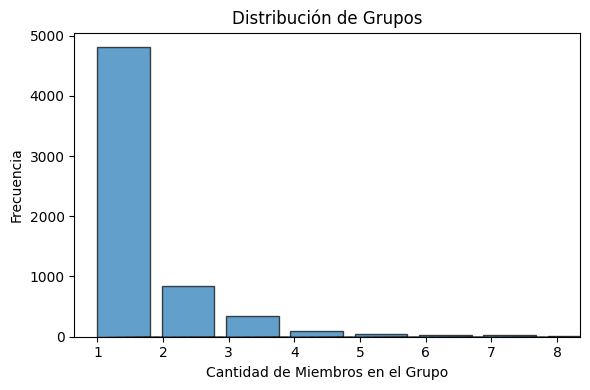

In [13]:
temp_df = train_data.copy()

# Modificar el DataFrame temporal
temp_df['Group'] = temp_df['PassengerId'].str.split('_').str[0]
temp_df['Id'] = temp_df['PassengerId'].str.split('_').str[1]

# Contar la cantidad de grupos diferentes en el DataFrame temporal
num_unique_groups = temp_df['Group'].nunique()

# Calcular la frecuencia de cada grupo en el DataFrame temporal
grupo_counts = temp_df['Group'].value_counts()

# Crear un histograma del DataFrame temporal
plt.figure(figsize=(6, 4))
plt.hist(grupo_counts, bins=50, edgecolor='k', alpha=0.7, width=0.8, align='mid')
plt.title('Distribución de Grupos')
plt.xlabel('Cantidad de Miembros en el Grupo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [14]:
print("Queremos observar como venian agrupados los pasajeros")
print()
grupo_counts_by_members = grupo_counts.value_counts().sort_index()

grupo_members_table = pd.DataFrame({
    'Número de Miembros en el Grupo': grupo_counts_by_members.index,
    'Cantidad de Grupos': grupo_counts_by_members.values
})

total_groups = len(temp_df['Group'].unique())
grupo_members_table['Porcentaje'] = (grupo_members_table['Cantidad de Grupos'] / total_groups) * 100

print(grupo_members_table)
print()
print(f"Podemos Concluir que el {grupo_members_table.iloc[0, 2]:.2f} % de los pasajeros viajaba solo")


Queremos observar como venian agrupados los pasajeros

   Número de Miembros en el Grupo  Cantidad de Grupos  Porcentaje
0                               1                4805       77.29
1                               2                 841       13.53
2                               3                 340        5.47
3                               4                 103        1.66
4                               5                  53        0.85
5                               6                  29        0.47
6                               7                  33        0.53
7                               8                  13        0.21

Podemos Concluir que el 77.29 % de los pasajeros viajaba solo


In [15]:
print("Queremos observar como afecta el tamaño del grupo a la variable objetivo")
print()
# train_data['Members'] = train_data.groupby('Group')['Id'].transform('count') - 1
temp_df['Members'] = temp_df.groupby('Group')['Id'].transform('count') 
members_survival = temp_df.groupby('Members')['Transported'].mean() * 100
members_survival = members_survival.reset_index()
members_table = pd.DataFrame({
    'Members': members_survival['Members'],
    'Survivors': members_survival['Transported']
})
print(members_table)

print()
print("Podemos concluir que si viajabas solo tenias menos probabilidades de ser transportado")

Queremos observar como afecta el tamaño del grupo a la variable objetivo

   Members  Survivors
0        1      45.24
1        2      53.80
2        3      59.31
3        4      64.08
4        5      59.25
5        6      61.49
6        7      54.11
7        8      39.42

Podemos concluir que si viajabas solo tenias menos probabilidades de ser transportado


### Variable "HomePlanet"

El planeta del cual el pasajero partió, generalmente su planeta de residencia permanente.

In [16]:
print("Observemos como esta distribuida la variable HomePlanet")
fig = px.histogram(data_frame=train_data, x=['HomePlanet'], color=None, facet_row=
    None, facet_col=None, marginal=None, cumulative=False, )
fig.update_layout(
    height=300,  # Altura en píxeles
    width=500    # Ancho en píxeles
)
fig.show()

Observemos como esta distribuida la variable HomePlanet


In [17]:
homeplanet_distribution = train_data['HomePlanet'].value_counts()
print(homeplanet_distribution)
null_count = train_data['HomePlanet'].isnull().sum()
print(f"Número de valores nulos en la columna 'HomePlanet': {null_count}")


HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Número de valores nulos en la columna 'HomePlanet': 201


### Preprocesamiento de los datos

In [18]:
# completamos valores nulos
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='mean' )
imputer.fit(train_data[imputer_cols])
train_data[imputer_cols] = imputer.transform(train_data[imputer_cols])
test_data[imputer_cols] = imputer.transform(test_data[imputer_cols])
train_data["HomePlanet"].fillna('Z', inplace=True)
test_data["HomePlanet"].fillna('Z', inplace=True)

In [19]:
#TODO cambiar a one hot encoder
label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP"]
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train ,test = label_encoder(train_data,test_data ,label_cols)

In [20]:
#preparamos los datos para dividirlos
train_data.drop(["Name" ,"Cabin","PassengerId"] , axis = 1 ,inplace = True)
test_data.drop(["Name" ,"Cabin","PassengerId"] , axis = 1 ,inplace = True)
X = train_data.drop("Transported" , axis =1 )
y = train_data["Transported"]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8,test_size=0.2,random_state=0)

In [21]:
#definimos varios clasificadores/modelos con sus hiperparametros para hacer grid research
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),
    "KNN" : KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier(random_state=0),
    "LGBM" : XGBClassifier(random_state=0),
    "NaiveBayes": GaussianNB()
}
# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}


RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "NaiveBayes": NB_grid
}

In [22]:
# ejecutamos el grid research para buscar los parametros que nos indican los mejores resultados para cada modelo
i=0
clf_best_params=classifiers.copy()
test_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'testation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    test_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    test_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', test_scores.iloc[i,2])
    print('')
    i+=1

Model: LogisticRegression
Training time (mins): 0.06

Model: KNN
Training time (mins): 0.01

Model: RandomForest
Training time (mins): 0.55

Model: LGBM
Training time (mins): 0.52

Model: NaiveBayes
Training time (mins): 0.0



In [23]:
#observamos los resultados
test_scores

,Classifer,testation accuracy,Training time
0,LogisticRegression,0.78,0.06
1,KNN,0.77,0.01
2,RandomForest,0.79,0.55
3,LGBM,0.78,0.52
4,NaiveBayes,0.67,0.00


In [24]:
#vemos los mejores hiper parametros para cada modelo
clf_best_params

{'LogisticRegression': {'C': 0.25, 'max_iter': 100, 'penalty': 'l2'},
 'KNN': {'n_neighbors': 9, 'p': 1},
 'RandomForest': {'max_depth': 8, 'n_estimators': 300},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100},
 'NaiveBayes': {'var_smoothing': 1e-10}}

### Concluimos que los mejores resultados son para el modelo

XGBClassifier con los Hyper parametros ('learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150)


## Evaluación y Análisis de Modelo utilizando XGBoost con Validación Cruzada

In [25]:
# Crear el pipeline
my_pipeline = Pipeline(steps=[
    ('model', XGBClassifier(**clf_best_params["LGBM"], random_state=0))
])

# Realizar la validación cruzada y obtener las probabilidades y los scores
proba_predictions = cross_val_predict(my_pipeline, X, y, cv=10, method='predict_proba')
accuracy_scores = cross_val_predict(my_pipeline, X, y, cv=10, method='predict')

# Calcular promedio de las probabilidades de la clase positiva
preds = proba_predictions[:, 1].mean()

# Calcular promedio del score de precisión
average_accuracy = accuracy_score(y, accuracy_scores)

# Imprimir los resultados
print("Average probability:", preds)
print("Average accuracy:", average_accuracy)


Average probability: 0.5023012
Average accuracy: 0.7975382491659956


## Entrenamiento del Modelo

In [26]:
my_pipeline.fit(X, y)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

## Predicción de Clases y Probabilidades 

In [27]:
class_predictions = my_pipeline.predict(test_data)  # Predicciones de clases
prob_predictions = my_pipeline.predict_proba(test_data)  # Probabilidades de clases

Text(0.5, 0, 'Probabilidad')

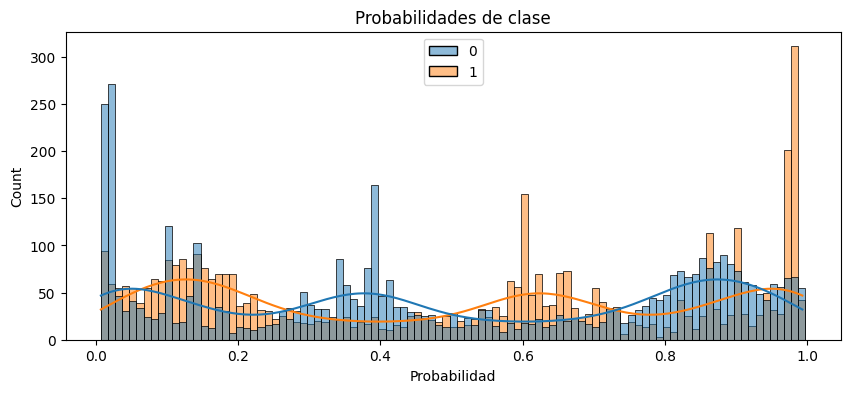

In [28]:
plt.figure(figsize=(10,4))
sns.histplot(prob_predictions, binwidth=0.01, kde=True)
plt.title('Probabilidades de clase')
plt.xlabel('Probabilidad')

In [29]:
preds_tuned=(prob_predictions>=0.500)
enviar=pd.DataFrame(preds_tuned)

Text(0.5, 1.0, 'Distribución de predicción')

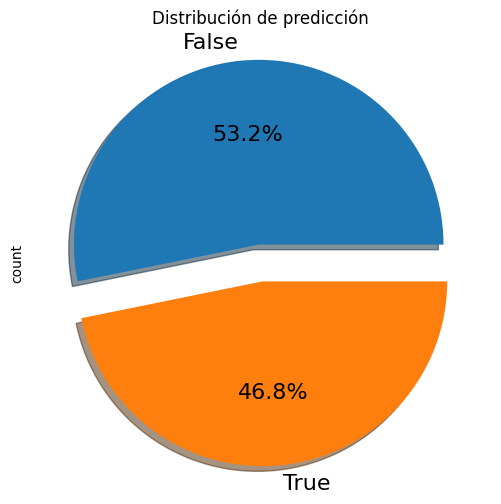

In [30]:
sub=pd.read_csv('../data/sample_submission.csv')
sub['Transported'] = enviar.iloc[:, 0]
# Graficamos la Distribución de predicción
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Distribución de predicción")

In [31]:
# Output to csv
sub.to_csv('../data/salida.csv', index=False)